In [119]:
import pandas as pd
import numpy as np
dianna=pd.read_csv('D:\Semester 4\Soft Computing\Chennai Water Supply Manager\\dianna.csv',parse_dates={'date' : ['Date']},na_values=-1)
dianna.info()
dianna.dropna(inplace=True)
dianna=dianna.reset_index()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5844 entries, 0 to 5843
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              5844 non-null   datetime64[ns]
 1   nth day in year   5844 non-null   int64         
 2   Storage (mcft)    5830 non-null   float64       
 3   Inflow (cusecs)   5830 non-null   float64       
 4   Rainfall (mm)     5830 non-null   float64       
 5   Outflow (cusecs)  5816 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 274.1 KB


In [120]:

raw=dianna.drop(columns=['index','date','nth day in year'])
rawd=dianna.drop(columns=['index','date','nth day in year','Outflow (cusecs)'])

<Figure size 432x288 with 0 Axes>

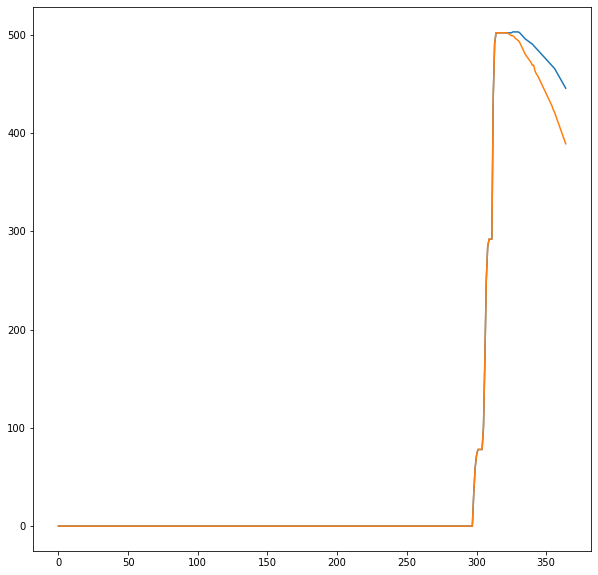

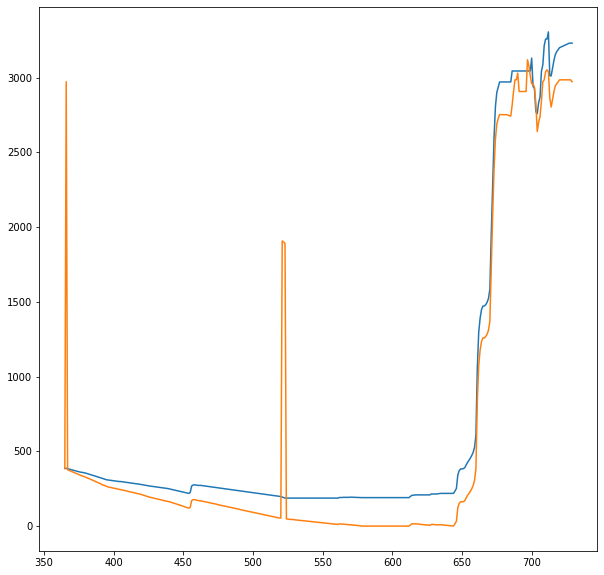

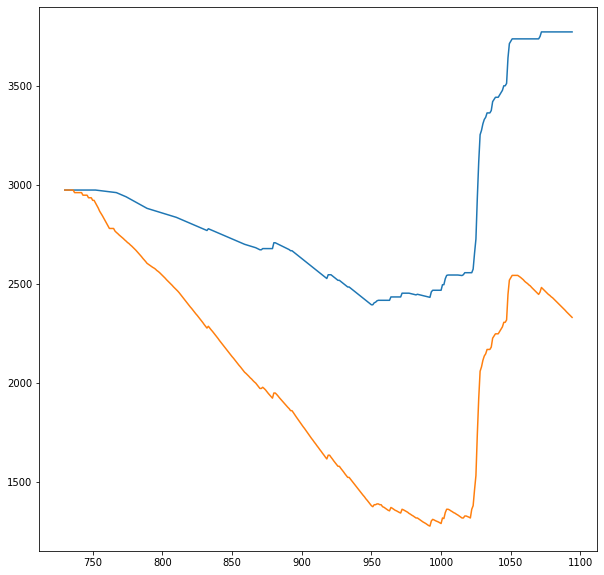

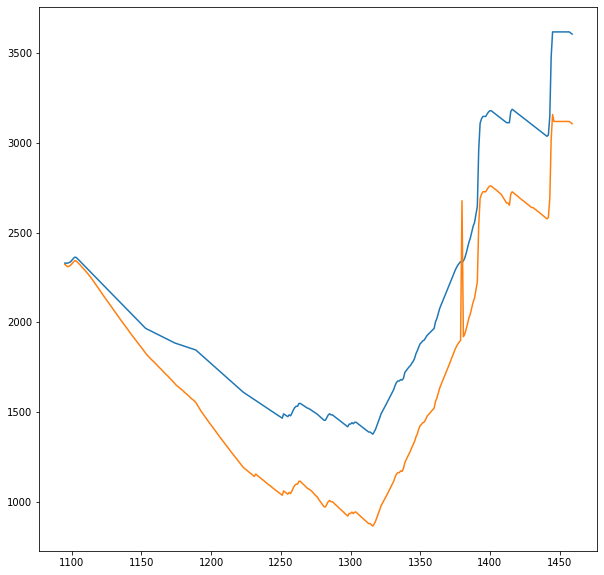

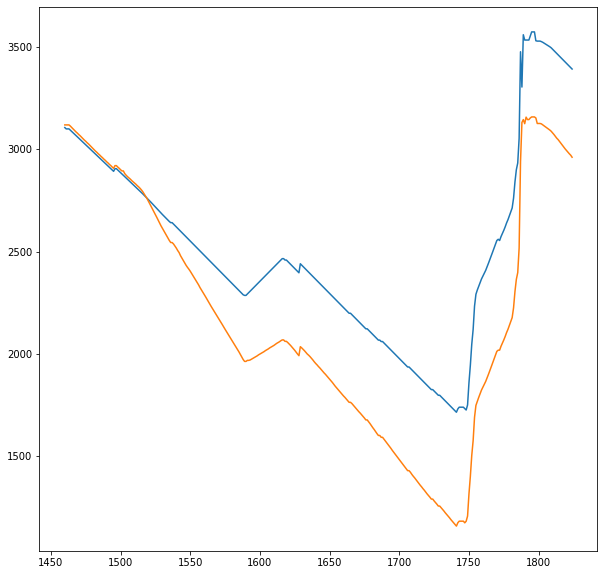

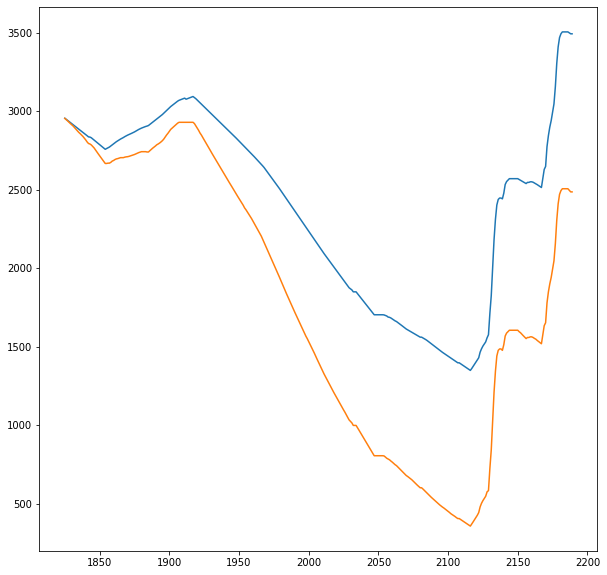

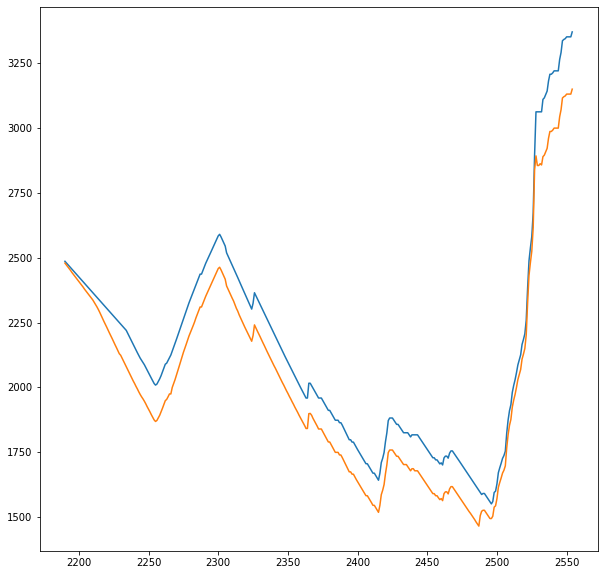

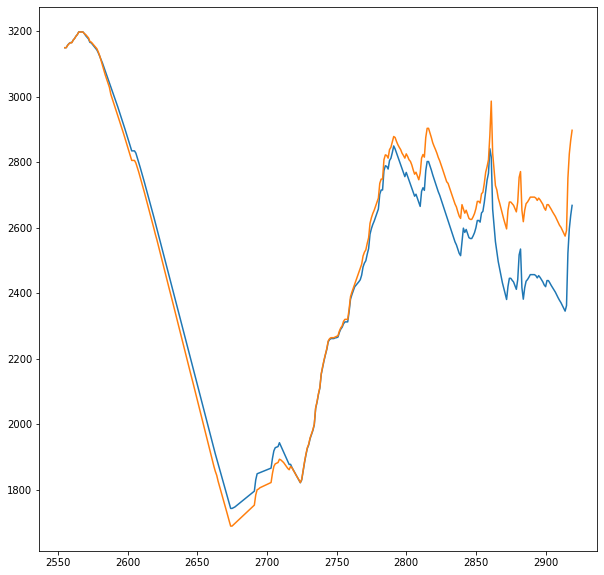

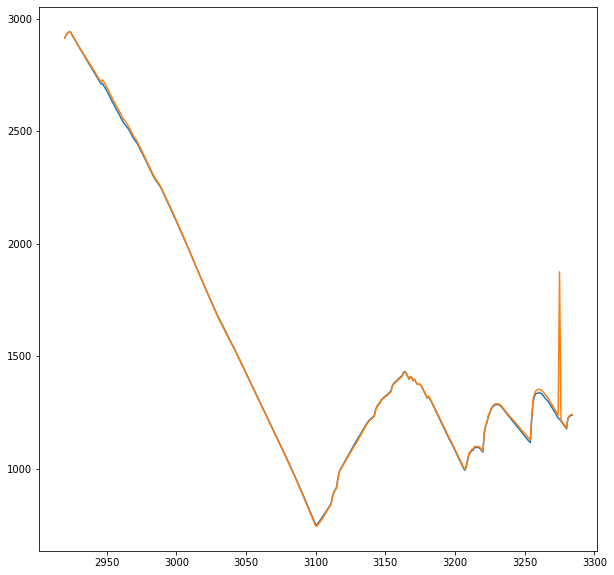

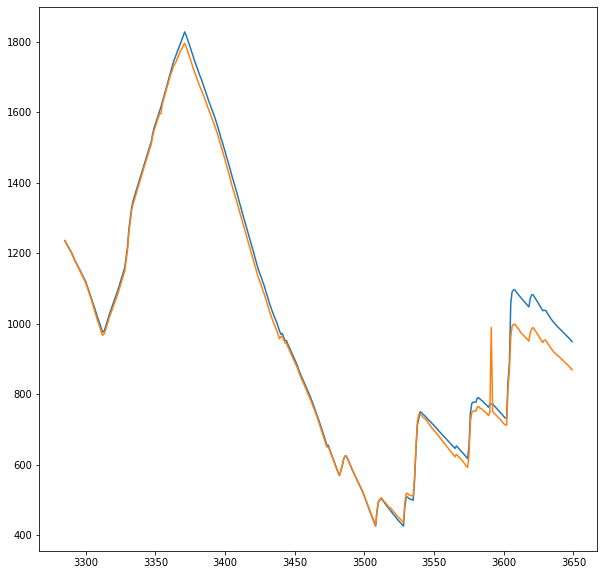

In [143]:
import gym
import matplotlib.pyplot as plt
from gym import spaces
from gym.utils import seeding
import numpy as np
from os import path
lookback=5
i=0
class symbio(gym.Env):
        metadata = {
            'render.modes': ['human']
        }


        def step(self, a):
            self.action=a
            outflow_factor=0.0864
            inflow_factor=0.0864
            EVAPORATION=0#np.random.random()*1.5#-raw.iloc[self.count+lookback,2]
            if(self.count%365<175 and self.count%365>20):
                EVAPORATION=0#np.random.random()*1+1
            #if(raw.iloc[self.count+lookback,2]==0):
                #EVAPORATION=np.random.random(1)*2+2

            res=self.state[4][0]-EVAPORATION+(raw.iloc[lookback+self.count,1]*inflow_factor)-(self.action*outflow_factor)
            if(res<0):
                res=0
            nextt=np.array(self.state[1:]).tolist()
            nextt.append([res,raw.iloc[lookback+self.count,1],raw.iloc[lookback+self.count,2],self.action])
            self.state=np.array(nextt)

            
            if(self.action<0):
                self.reward=-10
            if(res>3000):
                self.bad_day+=1
                self.reward=-1
                
            else:
                self.good_day+=1
                self.reward=-1
        
            self.reward=(self.action/self.DEMAND_THRESHOLD)-1
            if(self.reward<0):
                self.bad_day+=1
                self.reward=-1
            self.count+=1

            return self.state, self.reward, self.count>=len(raw)-lookback, {}


        def __init__(self, seed=0):
            self.DEMAND_THRESHOLD=120
            self.MAX_CAPACITY=3000
            self.action = 0.
            self.count = seed
            self.good_day = 0
            self.bad_day = 0
            self.reward=0


            lookback=5
            self.next_state=np.zeros((lookback,raw.shape[-1]))

            sequence=np.zeros((lookback,raw.shape[-1]))
            for j in range(0,lookback):
                    sequence[j]=raw.loc[seed+j,:]
            self.state = sequence

            a=[]
            for i in range(lookback):
                a.append([0., 0.,0., 0.])
            self.low=np.array(a, dtype=np.float32)

            a=[]
            for i in range(lookback):
                a.append([4000., 100000.,1000., 100000.])
            self.high=np.array(a, dtype=np.float32)
            self.action_space = spaces.Box(
                low=0,
                high=100000, shape=(1,),
                dtype=np.uint8
            )
            self.observation_space = spaces.Box(
                low=self.low,
                high=self.high,
                dtype=np.float32
            )


        def reset(self,seed=0):
            self.DEMAND_THRESHOLD=100
            self.MAX_CAPACITY=3000
            self.action = 0.
            self.count = seed
            self.good_day = 0
            self.bad_day = 0
            self.reward=0
            self.next_state=np.zeros((lookback,raw.shape[-1]))
            sequence=np.zeros((lookback,raw.shape[-1]))
            for j in range(0,lookback):
                    sequence[j]=raw.loc[seed+j,:]
            self.state = sequence
            return self.state


        def render(self, mode='human'):
            ;

plt.clf()
import matplotlib.pyplot as plt
for ij in range(0,10):
    
    i=ij*365
    j=i
    a=[]
    env=Chembarambaakam(i)
    state=env.reset(i)
    done=False
    while(not done and i!=j+365):
            #print(i)
            state,reward,done,_=env.step(raw.iloc[lookback+i,3])
            #print(state[4][0],done)
            a.append(state[4][0])
            score+=reward
            i+=1
    plt.figure(figsize=(10,10))
    plt.plot(range(j,i),a)
    plt.plot(range(j,i),raw.iloc[j+lookback:i+lookback,0])
    plt.show()

In [77]:
env.bad_day

208

In [45]:
len(raw)-lookback

5811

In [113]:
env.action_space.high=np.array([10000],dtype='float64')


array([10000.])

In [129]:
class ExploitExplore:
    def __init__(self,epsilon=0.95,decay=0.995):
        self.result=0
        self.epsilon=epsilon
        self.decay=decay
    def reset_states(self,epsilon=0.95,decay=0.995):
        self.result=0
        self.epsilon=epsilon
        self.decay=decay
       
    def sample(self):
        env=symbio
        return np.array([np.random.random()*10000])

In [130]:
random_process=ExploitExplore()
random_process.sample()

array([853.70738637])

In [144]:

import numpy as np
import gym

from keras.models import Sequential, Model
from keras.layers import Dense, Activation, Flatten, Input, Concatenate,LSTM ,Reshape
from keras import optimizers #import Adam
from keras import layers,models
from rl.agents import DDPGAgent
from rl.memory import SequentialMemory
from rl.random import OrnsteinUhlenbeckProcess


ENV_NAME = 'Pendulum-v0'
import tensorflow

# Get the environment and extract the number of actions.
env = symbio()
env.action_space.high=np.array([10000],dtype='float64')

#np.random.seed(123)
#env.seed(123)
assert len(env.action_space.shape) == 1
nb_actions = env.action_space.shape[0]

# Next, we build a very simple model.


input1=Input(shape=(1,) + env.observation_space.shape, name='observation_inputXX')
flatu=Reshape((5,4))(input1)
lstm1=LSTM(32,
                        dropout=0.1,
                        recurrent_dropout=0.5)(flatu)
                        #return_sequences=True,
                        #input_shape=(5,4

'''model.add(layers.LSTM(100, 
                        dropout=0.1,
                        recurrent_dropout=0.5))
                        '''
dense1=Dense(nb_actions)(lstm1)

grassist = Model(inputs=input1, outputs=dense1)
#DhanVan3.compile(loss='mae', optimizer=optimizers.RMSprop())
'''
actor = Sequential()
actor.add(Flatten(input_shape=(1,) + env.observation_space.shape))
actor.add(Dense(16))
actor.add(Activation('relu'))
actor.add(Dense(16))
actor.add(Activation('relu'))
actor.add(Dense(16))
actor.add(Activation('relu'))
actor.add(Dense(nb_actions))'''
#actor.add(Activation('linear'))
print(grassist.summary())

action_input = Input(shape=(nb_actions,), name='action_input')
observation_input = Input(shape= (1,) +env.observation_space.shape, name='observation_input')
flattened_observation = Flatten()(observation_input)
x = Concatenate()([action_input, flattened_observation])
x = Dense(32)(x)
x = Activation('relu')(x)
x = Dense(32)(x)
x = Activation('relu')(x)
x = Dense(32)(x)
x = Activation('relu')(x)
x = Dense(1)(x)
#x = Activation('linear')(x)
eshwar = Model(inputs=[action_input, observation_input], outputs=x)
print(eshwar.summary())

# Finally, we configure and compile our agent. You can use every built-in Keras optimizer and
# even the metrics!

#random_process = OrnsteinUhlenbeckProcess(size=nb_actions, theta=.15, mu=0., sigma=.3)
memory = SequentialMemory(limit=100000, window_length=1)
#random_process = OrnsteinUhlenbeckProcess(size=nb_actions, theta=.15, mu=0., sigma=.3)
agent = DDPGAgent(nb_actions=nb_actions, actor=grassist, critic=eshwar, critic_action_input=action_input,
                  memory=memory,
                  random_process=None,gamma=.99,
                  target_model_update=1e-2,
                  nb_steps_warmup_critic=100, nb_steps_warmup_actor=100
                 )
                  #,gamma=.99, 
                  
agent.compile(optimizers.RMSprop(), metrics=['mae'])

# Okay, now it's time to learn something! We visualize the training here for show, but this
# slows down training quite a lot. You can always safely abort the training prematurely using
# Ctrl + C.
agent.fit(env, nb_steps=50000, visualize=True, verbose=1, nb_max_episode_steps=len(raw)-lookback)

# After training is done, we save the final weights.
agent.save_weights('ddpg_{}_weights.h5f'.format(ENV_NAME), overwrite=True)

# Finally, evaluate our algorithm for 5 episodes.
#agent.test(env, nb_episodes=5, visualize=True, nb_max_episode_steps=200)

Model: "model_45"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
observation_inputXX (InputLa (None, 1, 5, 4)           0         
_________________________________________________________________
reshape_24 (Reshape)         (None, 5, 4)              0         
_________________________________________________________________
lstm_23 (LSTM)               (None, 32)                4736      
_________________________________________________________________
dense_111 (Dense)            (None, 1)                 33        
Total params: 4,769
Trainable params: 4,769
Non-trainable params: 0
_________________________________________________________________
None
Model: "model_46"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
observation_input (InputLayer)  (

In [147]:
env.bad_day

23

In [128]:
a.shape

(1,)

In [148]:
env=newgen()
agent.test(env, nb_episodes=5, visualize=True, nb_max_episode_steps=len(raw)-lookback)

Testing for 5 episodes ...


TypeError: unsupported format string passed to numpy.ndarray.__format__

In [56]:
grassist.predict(np.array([[env.reset()]]))[0][0]

0.0

In [57]:
b=[]
b

[]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5088 entries, 0 to 5113
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              5088 non-null   datetime64[ns]
 1   nth day in year   5088 non-null   int64         
 2   Storage (mcft)    5088 non-null   float64       
 3   Inflow (cusecs)   5088 non-null   float64       
 4   Rainfall (mm)     5088 non-null   float64       
 5   Outflow (cusecs)  5088 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 278.2 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5088 entries, 0 to 5087
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Storage (mcft)    5088 non-null   float64
 1   Inflow (cusecs)   5088 non-null   float64
 2   Rainfall (mm)     5088 non-null   float64
 3   Outflow (cusecs)  5088 non-null   float64
dty

<Figure size 432x288 with 0 Axes>

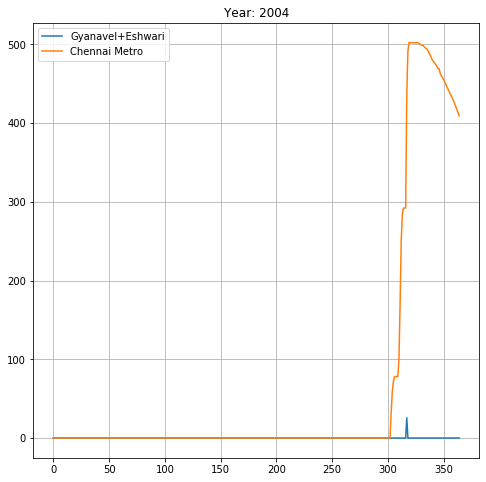


Year  2005
Progress: ----------------------------------------------------------------------------------------------------------------------

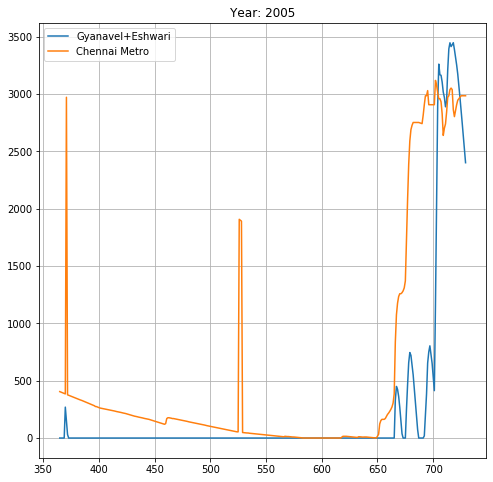


Year  2006
Progress: -------------------------------------------------------------------------------------------------------------

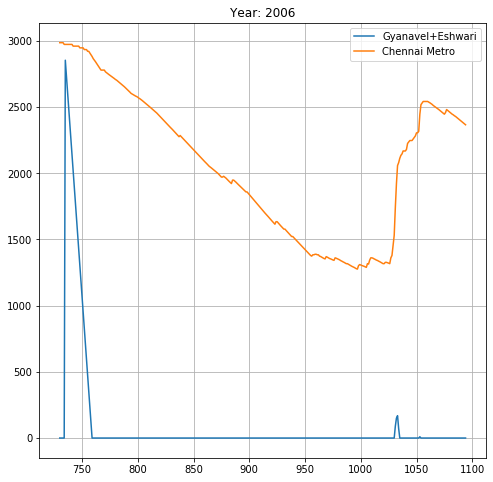


Year  2007
Progress: ----------------------------------------------------------------------------------------------------

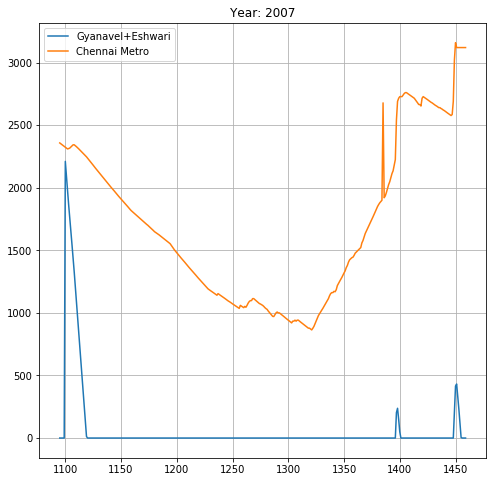


Year  2008
Progress: -------------------------------------------------------------------------------------------

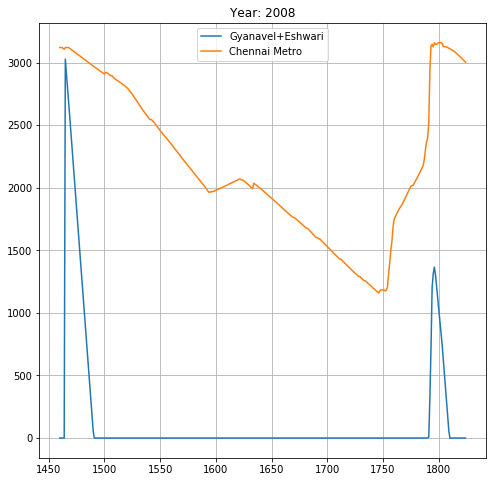


Year  2009
Progress: ----------------------------------------------------------------------------------

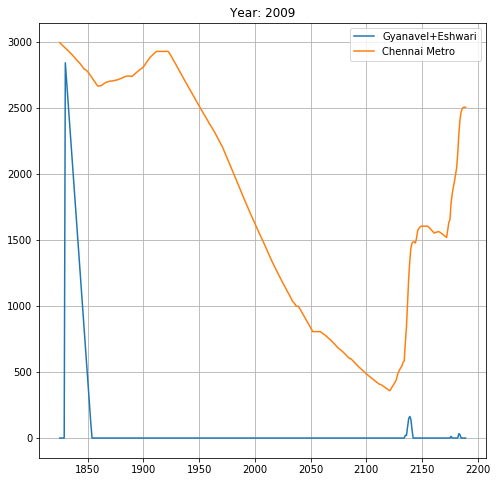


Year  2010
Progress: -------------------------------------------------------------------------

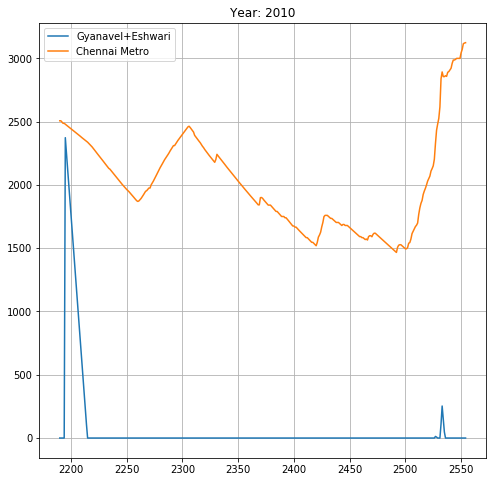


Year  2011
Progress: ----------------------------------------------------------------

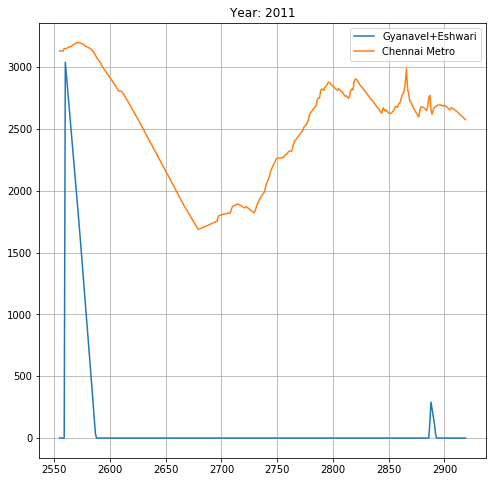


Year  2012
Progress: ------------------------------------------------------

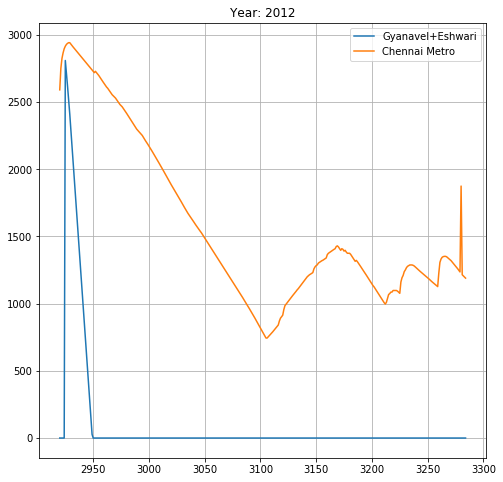


Year  2013
Progress: ---------------------------------------------

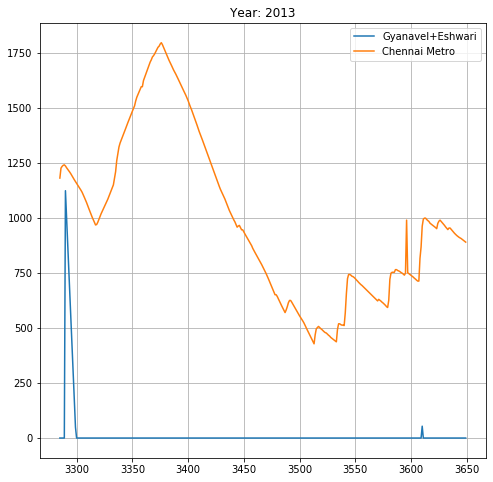

In [150]:

dianna=pd.read_csv('D:\Semester 4\Soft Computing\Chennai Water Supply Manager\\CHdianna.csv',parse_dates={'date' : ['Date']},na_values=-1)

dianna.dropna(inplace=True)
dianna.info()
dianna=dianna.reset_index()
raw=dianna.drop(columns=['index','date','nth day in year'])
raw.info()
import gym
from gym import spaces
from gym.utils import seeding
import numpy as np
from os import path

plt.clf()
import matplotlib.pyplot as plt

for ij in range (0,10):

    seed=365*ij

    env=Chembarambaakam(seed)
    env2=newgen(seed)
    
    env3=Chembarambaakam(seed)
    env4=Chembarambaakam(seed)
    state2=env2.reset(seed)
    state3=env3.reset(seed)
    
    state4=env4.reset(seed)
    done=False
    done2=False
    done3=False
    
    done4=False
    
    i=lookback+seed
    a=[]
    b=[]
    c=[]
    d=[]
    for _ in range(lookback+seed):
        a.append(0.0)
        b.append(0.0)
        c.append(0.0)
        d.append(0.0)
    score=0
    score2=0
    score3=0
    
    print('\nYear ',2004+ij)
    print('Progress:',end=' ')
    while(not done and not done2 ):#and not done3 and not done4):
        #state,reward,done,_=env.step(raw.iloc[i,3])
        #a.append(state[4][0])
        action=grassist.predict(np.array([[state2]]))[0][0]
        state2,reward2,done2,_=env2.step(action)
        b.append(state2[4][0])
                
        #state3,reward3,done3,_=env3.step(elango.predict(np.array([state3]))[0][0])
        #c.append(state3[4][0])
                
        #state4,reward4,done4,_=env4.step(elango2.predict(np.array([state3]))[0][0])
        #d.append(state4[4][0])
        
        if(i%40==0):
            print('-',end='')
        #score2+=reward2
        i+=1
        if(i>=len(raw)):
            break
    
    
    start=seed
    end=start+365
    if(start+365>len(raw)):
        end=len(raw)
    plt.figure(figsize=(8,8))
    plt.plot(range(start,end),b[start:end])
    #plt.plot(range(start,end),a[start:end],linestyle='dashed')
    plt.plot(range(start,end),raw.iloc[start:end,0])
    #plt.plot(range(start,end),c[start:end])
    
    #plt.plot(range(start,end),d[start:end])
    plt.legend(['Gyanavel+Eshwari','Chennai Metro'])
    
    plt.title('Year: '+str(2004+ij))
    plt.grid()

    plt.show()
